Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df= pd.read_csv("census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32560, 15)

We can see that there 32560 rows and 15 columns in the dataset.

In [4]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Income is our target variable, and since there are two outcomes in it, we can treat this as a classification problem.

In [5]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

We can see that the workclass and marital status are the categorical varibles with more unique values.

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no missing values in the dataset.

In [7]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

Our target class is imbalanced.
Encoding the target class

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['Income'] = labelencoder.fit_transform(df['Income'])

Here 0 indicates Income <=50k and 1 indicates Income >50k

<AxesSubplot:title={'center':'Income count'}, xlabel='Income', ylabel='count'>

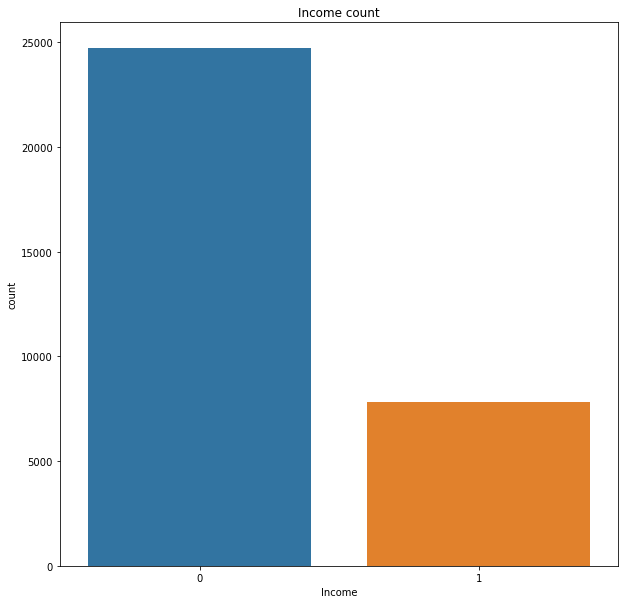

In [9]:
plt.figure(figsize=(10,10))
plt.title('Income count')
sn.countplot(df['Income'])

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

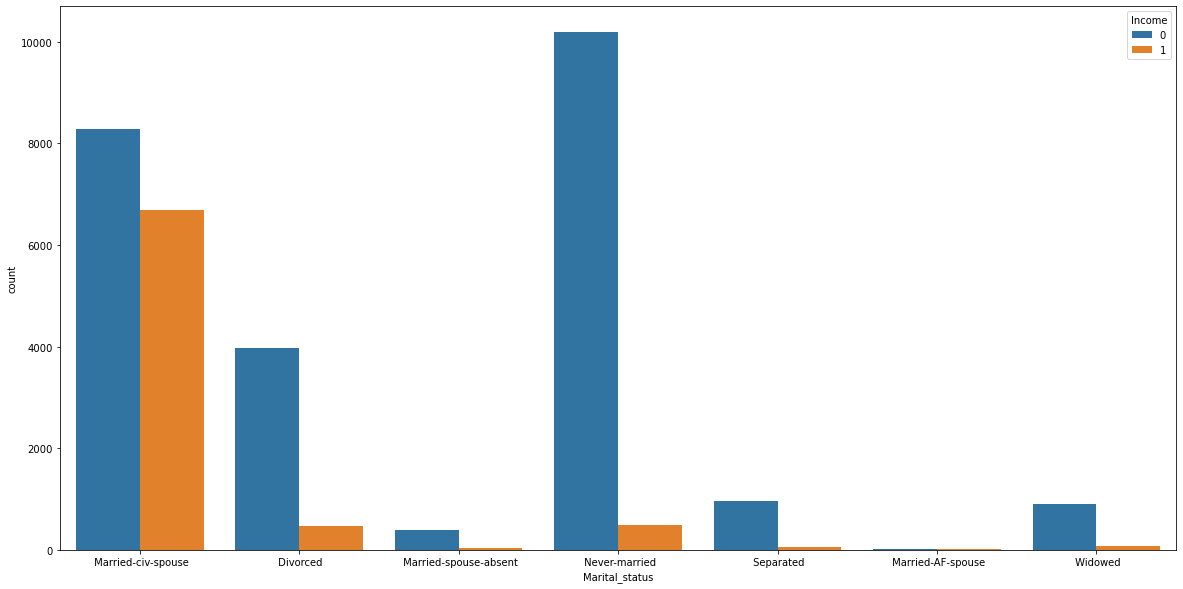

In [10]:
plt.figure(figsize=(20,10))
sn.countplot(data=df, x='Marital_status', hue='Income')

We can that Never married people have less than 50k and Married with civilian spouse usually have more income compared to the rest.

<AxesSubplot:xlabel='Sex', ylabel='count'>

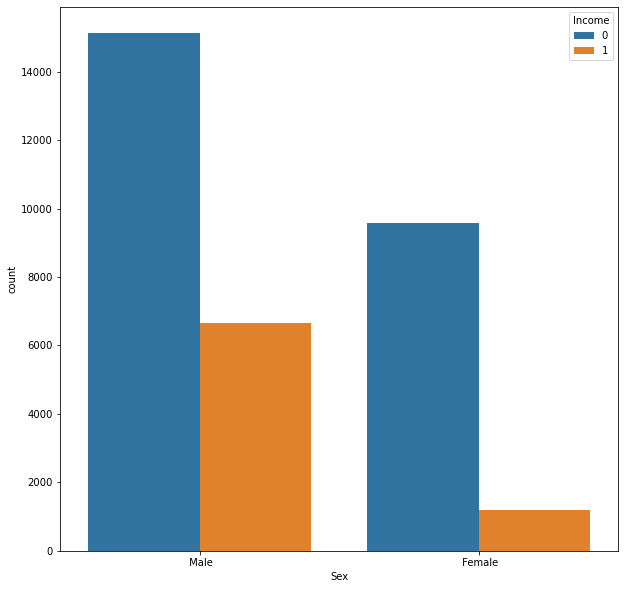

In [11]:
plt.figure(figsize=(10,10))
sn.countplot(data=df, x='Sex', hue='Income')

There are more men in the dataset and men are more likely to have salary more than 50k compared to female

Let us balance the target class by upsampling the minority

In [12]:
less_income= df[df.Income==0]
more_income = df[df.Income==1]

In [13]:
from sklearn.utils import resample
#upsampling minority
income_upsampled = resample(more_income,
                         replace = True,
                         n_samples = len(less_income),
                         random_state =27)

In [14]:
df_upsampled = pd.concat([less_income,income_upsampled])

In [15]:
cor=df.corr()
cor

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
Income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


In [16]:
df_upsampled.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


<AxesSubplot:xlabel='Race', ylabel='count'>

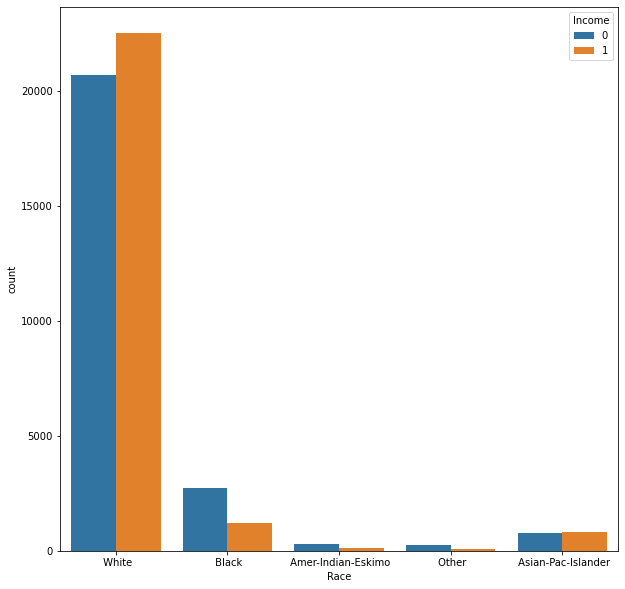

In [17]:
plt.figure(figsize=(10,10))
sn.countplot(data=df_upsampled, x='Race', hue='Income')

In [18]:
df_upsampled.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income             int32
dtype: object

In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
col = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country']
for i in col:
    df_upsampled[i] = labelencoder.fit_transform(df_upsampled[i])
df_upsampled
   

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,36,4,261382,12,14,2,12,0,4,1,15024,0,45,39,1
27643,56,2,273084,12,14,2,4,0,2,1,0,0,40,39,1
12382,45,4,199058,12,14,2,4,0,4,1,7298,0,50,39,1
14815,39,4,165235,9,13,5,10,4,1,0,0,0,40,30,1


In [20]:

cor=df_upsampled.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003759,-0.073990,0.012977,0.079300,-0.254147,-0.019229,-0.253827,0.049008,0.124748,0.082821,0.067811,0.058702,0.002425,0.294437
Workclass,0.003759,1.000000,-0.015810,0.023617,0.055085,-0.056213,0.223980,-0.083810,0.046892,0.094595,0.048638,0.024868,0.133475,-0.010282,0.059882
Fnlwgt,-0.073990,-0.015810,1.000000,-0.015102,-0.030802,0.022692,0.007815,0.001414,-0.019793,0.026771,0.004367,-0.012175,-0.007790,-0.039504,-0.011921
Education,0.012977,0.023617,-0.015102,1.000000,0.287262,-0.048468,-0.009137,-0.027306,0.021048,-0.003699,0.038064,0.013405,0.059445,0.056959,0.101311
Education_num,0.079300,0.055085,-0.030802,0.287262,1.000000,-0.094152,0.124823,-0.114985,0.041298,0.052007,0.139771,0.092112,0.167622,0.026539,0.381112
Marital_status,-0.254147,-0.056213,0.022692,-0.048468,-0.094152,1.000000,-0.012458,0.175591,-0.063563,-0.144565,-0.043097,-0.036665,-0.185261,-0.024639,-0.262534
Occupation,-0.019229,0.223980,0.007815,-0.009137,0.124823,-0.012458,1.000000,-0.081779,0.012388,0.083689,0.029842,0.014721,0.087191,-0.005724,0.084120
Relationship,-0.253827,-0.083810,0.001414,-0.027306,-0.114985,0.175591,-0.081779,1.000000,-0.115579,-0.660246,-0.057433,-0.062404,-0.261469,-0.016035,-0.284680
Race,0.049008,0.046892,-0.019793,0.021048,0.041298,-0.063563,0.012388,-0.115579,1.000000,0.093736,0.009123,0.025992,0.048587,0.162244,0.092237
Sex,0.124748,0.094595,0.026771,-0.003699,0.052007,-0.144565,0.083689,-0.660246,0.093736,1.000000,0.052634,0.055493,0.246703,-0.001679,0.266001


<AxesSubplot:>

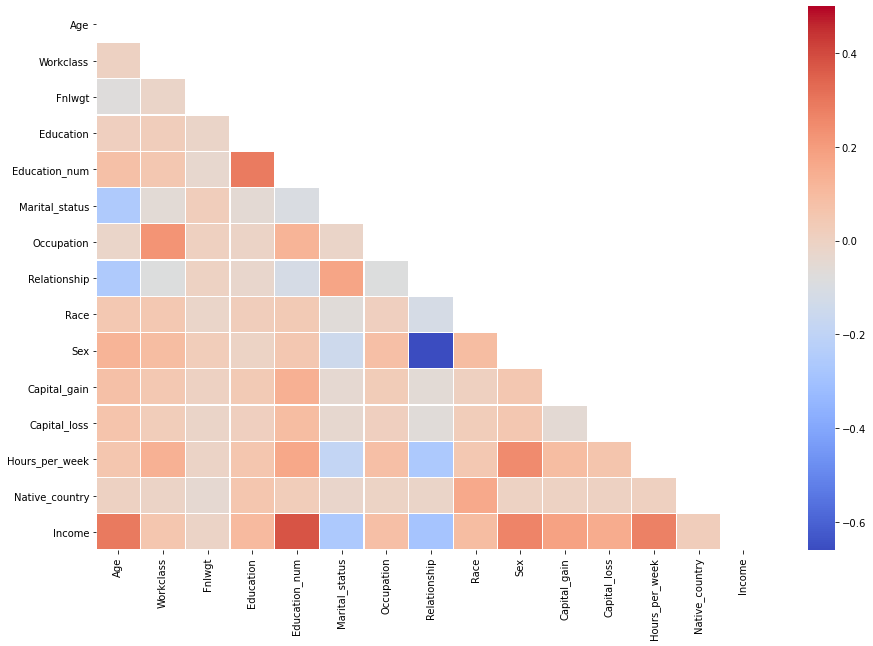

In [21]:
corr = df_upsampled.corr()
hide = np.zeros_like(corr)
hide[np.triu_indices_from(hide)] = True
plt.figure(figsize=(15, 10))
sn.heatmap(corr,
            vmax=.5,
            mask=hide,
            linewidths=.2, cmap="coolwarm")

<AxesSubplot:>

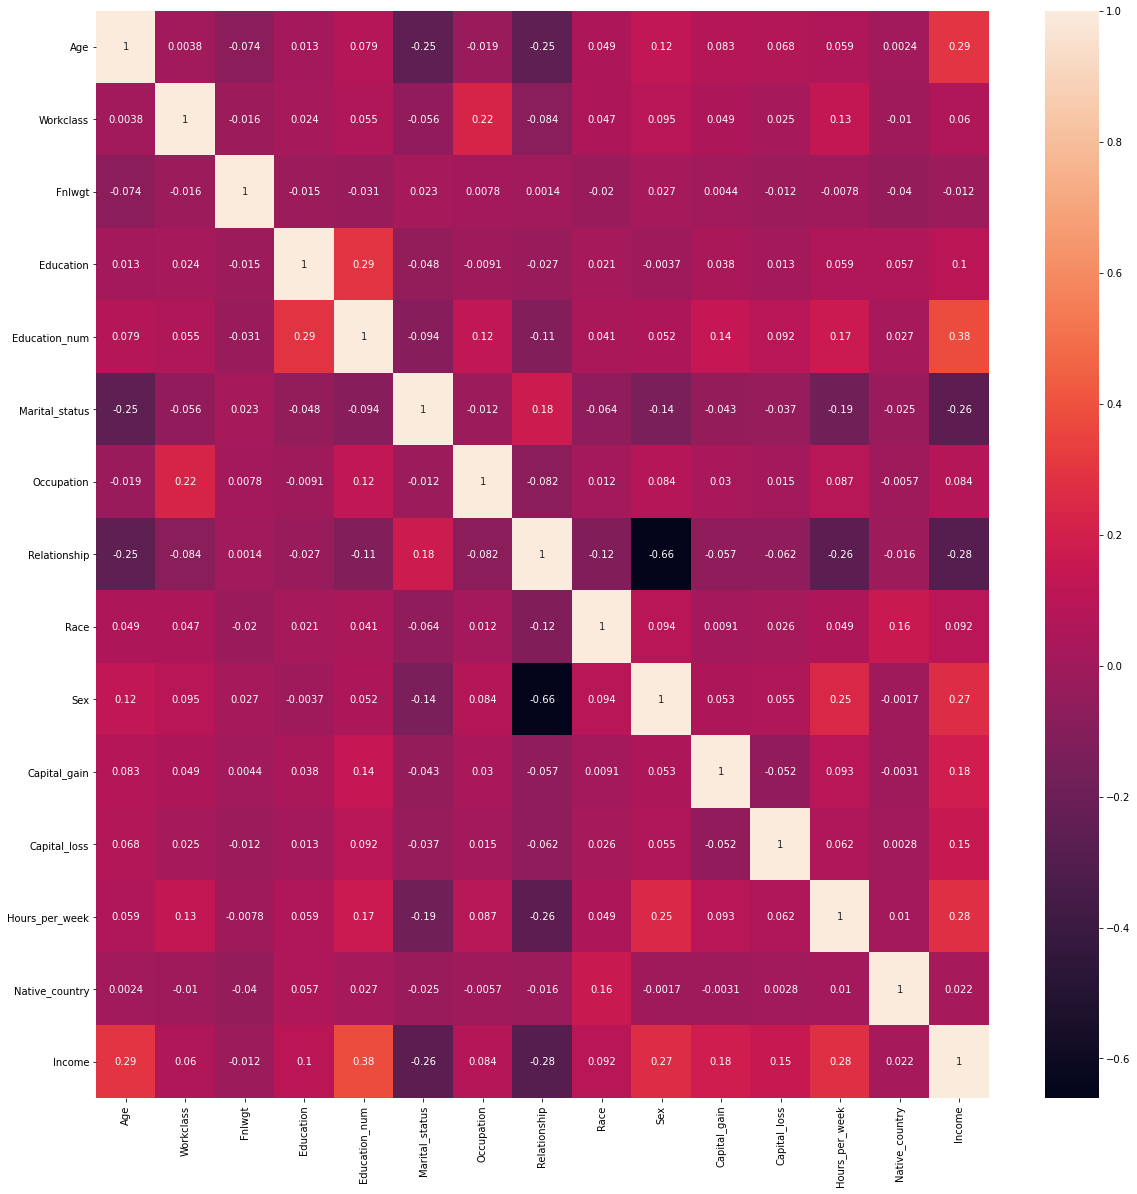

In [22]:
plt.figure(figsize=(20,20))
sn.heatmap(df_upsampled.corr(),annot=True)

From the above heatmap we can see that the Income is highly correlated to Marital Status, Relationship, Age and Education.

<b>Model Building<b>

In [23]:
y = df_upsampled['Income']
x = df_upsampled.drop(['Income'],axis = 1)

Scaling the data containing the feature variables

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.72341619,  1.44459222, -1.01351442, ..., -0.26184657,
        -2.39189773,  0.28177617],
       [-0.20076045,  0.0602456 ,  0.25431171, ..., -0.26184657,
        -0.18149522,  0.28177617],
       [ 0.95446035,  0.0602456 ,  0.4370584 , ..., -0.26184657,
        -0.18149522,  0.28177617],
       ...,
       [ 0.33834259,  0.0602456 ,  0.09539155, ..., -0.26184657,
         0.63717238,  0.28177617],
       [-0.12374573,  0.0602456 , -0.22864732, ..., -0.26184657,
        -0.18149522, -0.88116212],
       [-0.89389293,  0.0602456 ,  0.33640641, ..., -0.26184657,
        -0.18149522,  0.28177617]])

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
from sklearn.tree import DecisionTreeClassifier

maxaccu =0
maxrs = 0
for i in range(1,200):
    xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(xtrain,ytrain)
    pred = mod.predict(xtest)
    acc = accuracy_score(ytest,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs =i
print("Best accuracy is ",maxaccu,"on random state ",maxrs)

Best accuracy is  0.920873786407767 on random state  106


In [27]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=.25, random_state=maxrs)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [29]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      6224
           1       0.88      0.97      0.92      6136

    accuracy                           0.92     12360
   macro avg       0.92      0.92      0.92     12360
weighted avg       0.93      0.92      0.92     12360



In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[5439,  785],
       [ 188, 5948]], dtype=int64)

In [31]:
sv = SVC()
sv.fit(X_train,y_train)
y_pred = sv.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      6224
           1       0.79      0.88      0.84      6136

    accuracy                           0.83     12360
   macro avg       0.83      0.83      0.83     12360
weighted avg       0.83      0.83      0.83     12360



In [32]:
confusion_matrix(y_test,y_pred)

array([[4831, 1393],
       [ 734, 5402]], dtype=int64)

In [33]:
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.92      0.80      0.85      6224
           1       0.82      0.93      0.87      6136

    accuracy                           0.86     12360
   macro avg       0.87      0.86      0.86     12360
weighted avg       0.87      0.86      0.86     12360



In [34]:
confusion_matrix(y_test,y_pred)

array([[4975, 1249],
       [ 459, 5677]], dtype=int64)

In [35]:
lr= LogisticRegression(random_state=1)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      6224
           1       0.77      0.76      0.77      6136

    accuracy                           0.77     12360
   macro avg       0.77      0.77      0.77     12360
weighted avg       0.77      0.77      0.77     12360



In [36]:
confusion_matrix(y_test,y_pred)

array([[4822, 1402],
       [1464, 4672]], dtype=int64)

In [37]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      6224
           1       0.81      0.85      0.83      6136

    accuracy                           0.82     12360
   macro avg       0.83      0.82      0.82     12360
weighted avg       0.83      0.82      0.82     12360



In [38]:
confusion_matrix(y_test,y_pred)

array([[4998, 1226],
       [ 939, 5197]], dtype=int64)

In [39]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      6224
           1       0.90      0.98      0.94      6136

    accuracy                           0.93     12360
   macro avg       0.94      0.93      0.93     12360
weighted avg       0.94      0.93      0.93     12360



In [40]:
confusion_matrix(y_test,y_pred)

array([[5534,  690],
       [ 139, 5997]], dtype=int64)

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
print(cross_val_score(dtc,x_scaled,y,cv=5).mean())

0.918706220502029


In [43]:
print(cross_val_score(rfc,x_scaled,y,cv=5).mean())

0.935009533701703


In [44]:
print(cross_val_score(lr,x_scaled,y,cv=5).mean())

0.7691453165920532


In [45]:
print(cross_val_score(abc,x_scaled,y,cv=5).mean())

0.8284518415702617


In [46]:
print(cross_val_score(knc,x_scaled,y,cv=5).mean())

0.8617663804060316


In [47]:
print(cross_val_score(sv,x_scaled,y,cv=5).mean())

0.8299284933502624


In [48]:
from sklearn import metrics

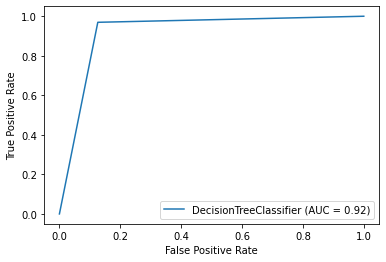

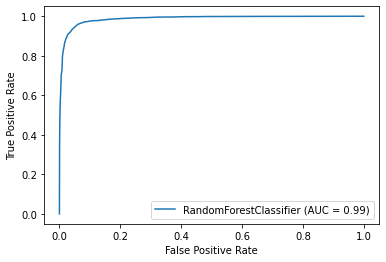

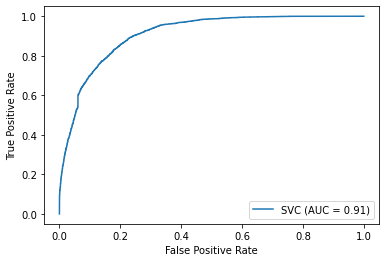

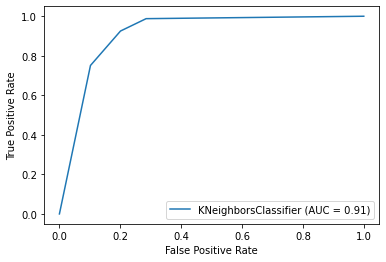

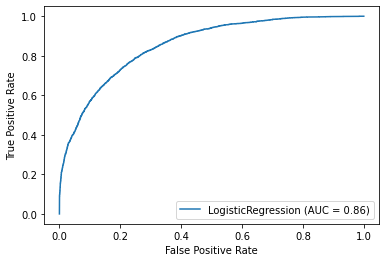

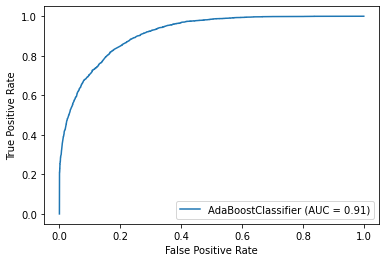

In [49]:
models =[dtc,rfc,sv,knc,lr,abc]
for i in models:
    metrics.plot_roc_curve(i, X_test, y_test)  
    plt.show()

We can see that the Random Forest Classifier is the best model according to the metrics

<b>Hyper parameter Tuning<b>

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
parameter = { 
            'max_depth' : np.arange(2,20),
              'criterion':['gini', 'entropy'],
             'max_features':['auto', 'sqrt', 'log2'],
             }

In [52]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=3)

In [53]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [54]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 19, 'max_features': 'sqrt'}

In [55]:
Final_mod = RandomForestClassifier(criterion='gini',max_depth=19,max_features='sqrt')
Final_mod.fit(X_train,y_train)
pred = Final_mod.predict(X_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

90.98705501618123


In [56]:
confusion_matrix(y_test,pred)

array([[5235,  948],
       [ 166, 6011]], dtype=int64)

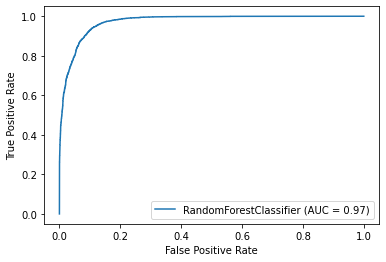

In [57]:
metrics.plot_roc_curve(Final_mod, X_test, y_test)  
plt.show()

<b> Saving the model <b>

In [58]:
import joblib
joblib.dump(Final_mod,"CensusIncome.pkl")

['CensusIncome.pkl']